#Problem 1


In [1]:
#Making data in a file named file.txt
import os
os.system("echo 1 > file.txt")
for i in range (2,10):
	os.system("echo "+str(i)+" >> file.txt")

In [2]:
with open("file.txt") as f:
	lst=[]
	for line in f:
		lst.append(int(line))

print(lst)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
usr_input=input("Enter string to convert it to number:")
print(int(usr_input))

Enter string to convert it to number:7678
7678


In [4]:
from datetime import datetime
datetimestr = '12/01/23 3:30:01'
datetime = datetime.strptime(datetimestr, '%m/%d/%y %H:%M:%S')
print(datetime)

2023-12-01 03:30:01


In [5]:
import subprocess
subprocess.check_output("cat file.txt",shell=True)

b'1\n2\n3\n4\n5\n6\n7\n8\n9\n'

In [6]:
lst=[1,2,1,2,3,4,2,1,1,1,1,1,1,3]
dict={}
for i in lst:
	if i in dict:
		dict[i]+=1
	else:
		dict[i]=1
print(dict)

{1: 8, 2: 3, 3: 2, 4: 1}


In [7]:
from pandas.core.common import flatten
nst_lst=[[1],[1,2],[[1,2,3]],[[[1,2,3,4]]],[[[[1,2,3,4,5]]]]]
print(list(flatten(nst_lst)))

[1, 1, 2, 1, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4, 5]


In [8]:
dict1={"a":1,"b":2,"c":3,"d":5}
dict2={"d":4,"e":5,"f":6}
dict={}
for i in dict1:
	dict[i]=dict1[i]
for i in dict2:
	if(i not in dict):
		dict[i]=dict2[i]
	else:
		dict[i]=dict[i]+dict2[i]

print(dict)

{'a': 1, 'b': 2, 'c': 3, 'd': 9, 'e': 5, 'f': 6}


In [9]:
lst=[1,2,1,2,3,4,2,1,1,1,1,1,1,3]
dict={}
for i in lst:
	if i in dict:
		dict[i]+=1
	else:
		dict[i]=1
newlst=[]
for i in dict:
  newlst.append(i)

print(newlst)

[1, 2, 3, 4]


In [10]:
dict={'a': 1, 'b': 2, 'c': 3, 'd': 9, 'e': 5, 'f': 6}
s=input("enter the key to search:")
if(s in dict):
	print("key is present and value of the key is:",dict[s])
else:
	print("key is not present")

enter the key to search:c
key is present and value of the key is: 3


#Problem 2

In [11]:
import numpy as np
mat1=np.array([[1,2,3],[4,5,6],[7,8,9]])
mat2=np.array([[10,11,12],[13,14,15],[16,17,18]])

print("first row of mat1:", mat1[0,:])
print("second column of mat2:",mat2[:,1])
print("matrix multiplication:\n",np.dot(mat1,mat2))
print("element wise multiplication:\n",mat1*mat2)
print("dot product between each column of first matrix and each column of second matrix:\n",np.dot(mat1.T, mat2))

first row of mat1: [1 2 3]
second column of mat2: [11 14 17]
matrix multiplication:
 [[ 84  90  96]
 [201 216 231]
 [318 342 366]]
element wise multiplication:
 [[ 10  22  36]
 [ 52  70  90]
 [112 136 162]]
dot product between each column of first matrix and each column of second matrix:
 [[174 186 198]
 [213 228 243]
 [252 270 288]]


#Problem 3

In [12]:
#Importing csv
import os
os.system("wget https://www.dropbox.com/s/uarfqnl296nebxt/Cars93.csv")

0

In [13]:
import pandas as pd
df=pd.read_csv("Cars93.csv")

In [14]:
# Question i
# (a) Model      - Nominal
# (b) Type       - Nominal
# (c) Max. Price - Ratio
# (d) Airbags    - Ordinal

In [15]:
#Question ii
def missingvalue(df):
    zdf=df.copy()
    return zdf.fillna(zdf.mean())

df=(missingvalue(df)).copy()

<ipython-input-15-3e00a4b6af60>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return zdf.fillna(zdf.mean())


In [16]:
#Question iii
def reducenoise(df):
    zdf=df.copy()
    expected_types = {col: type(zdf.iloc[0][col]) for col in zdf.columns}
    noise_rows = []
    for i, row in zdf.iterrows():
        has_noise = False
        for col in zdf.columns:
            if(str(type(row[col]))=="<class 'int'>" and str(expected_types[col])== "<class 'numpy.int64'>"):
                continue
            if(str(type(row[col]))=="<class 'float'>" and str(expected_types[col])== "<class 'numpy.float64'>"):
                continue
            if type(row[col]) != expected_types[col]:
                zdf.at[i, col] = None
                has_noise = True
        if has_noise:
            noise_rows.append(i)
    zdf = zdf.drop(noise_rows)
    return zdf



df=(reducenoise(df)).copy()
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.000000,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.000000,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.000000,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,21.1,6,193,106,70,37,31.0,17.000000,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.000000,3640,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,21.1,7,187,115,72,38,34.0,13.890244,3960,non-USA
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,18.5,5,180,103,67,35,31.5,14.000000,2985,non-USA
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,18.5,4,159,97,66,36,26.0,15.000000,2810,non-USA
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,15.8,5,190,104,67,37,29.5,14.000000,2985,non-USA


In [17]:
#Question iv
import pandas as pd

def encode_categorical(df, ordinal_cols=None, onehot_cols=None):
    zdf=df.copy()
    if ordinal_cols is not None:
        for col in ordinal_cols:
            zdf[col] = zdf[col].astype('category')
            zdf[col] = zdf[col].cat.codes

    if onehot_cols is not None:
        zdf = pd.get_dummies(zdf, columns=onehot_cols)

    return zdf

lst=['Manufacturer','Model','DriveTrain','Man.trans.avail','Origin']
for col in df.columns:
    if df[col].dtype == object:
        lst.append(col)
df=(encode_categorical(df,['Type','AirBags'],lst)).copy()

In [18]:
#Question v
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df
def normalize_features(df, method='joint', columns=None):
    zdf=df.copy()
    if method=='joint':
        scaler = MinMaxScaler()
        if columns is None:
            columns = zdf.columns
        zdf[columns] = scaler.fit_transform(zdf[columns])
        
    if method=='individual':
        if columns is None:
            columns = zdf.columns
        for col in columns:
            scaler = MinMaxScaler()
            zdf[col] = scaler.fit_transform(zdf[[col]])
    return zdf

df=normalize_features(df,'joint')

In [19]:
#Problem vi
def split_data(df, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    df = df.sample(frac=1).reset_index(drop=True)
    train_size = int(len(df) * train_ratio)
    val_size = int(len(df) * val_ratio)
    train = df[:train_size]
    val = df[train_size:train_size + val_size]
    test = df[train_size + val_size:]
    return train, val, test

split_data(df)

(    Min.Price     Price  Max.Price  MPG.city  MPG.highway  EngineSize  \
 0    0.134367  0.108257   0.094313  0.225806     0.233333    0.319149   
 1    0.193798  0.152294   0.130374  0.225806     0.366667    0.255319   
 2    0.576227  0.449541   0.374480  0.161290     0.300000    0.276596   
 3    0.715762  0.526606   0.414702  0.096774     0.200000    0.765957   
 4    0.000000  0.018349   0.029126  1.000000     1.000000    0.000000   
 ..        ...       ...        ...       ...          ...         ...   
 60   0.157623  0.121101   0.101248  0.290323     0.333333    0.212766   
 61   0.059432  0.047706   0.042996  0.225806     0.300000    0.170213   
 62   0.496124  0.398165   0.338419  0.161290     0.200000    0.382979   
 63   0.958656  1.000000   1.000000  0.129032     0.166667    0.468085   
 64   0.315245  0.280734   0.259362  0.096774     0.066667    0.297872   
 
     Horsepower       RPM  Rev.per.mile  Fuel.tank.capacity  ...  Cylinders_3  \
 0     0.183673  0.370370    

#Problem 4

##a

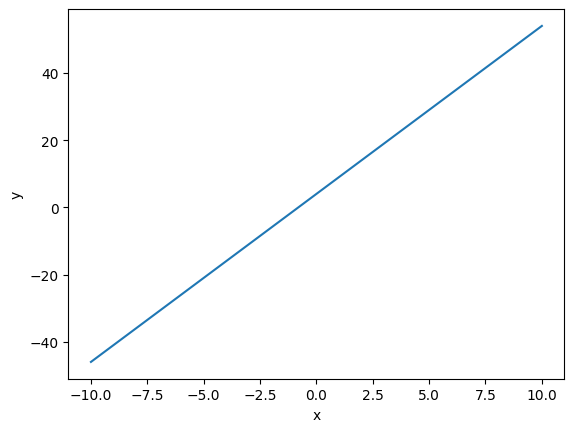

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
y = 5*x+4
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

##b

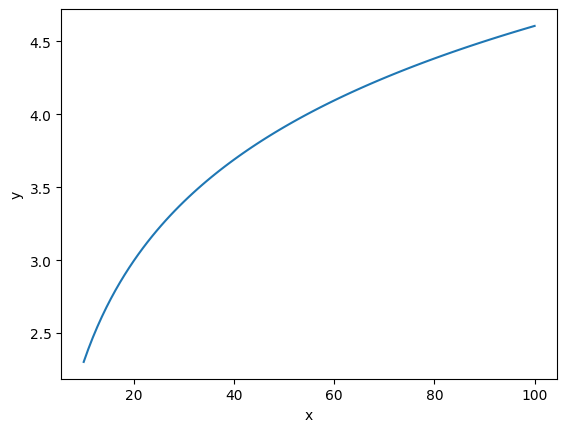

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(10, 100, 100)
y = np.log(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

##c


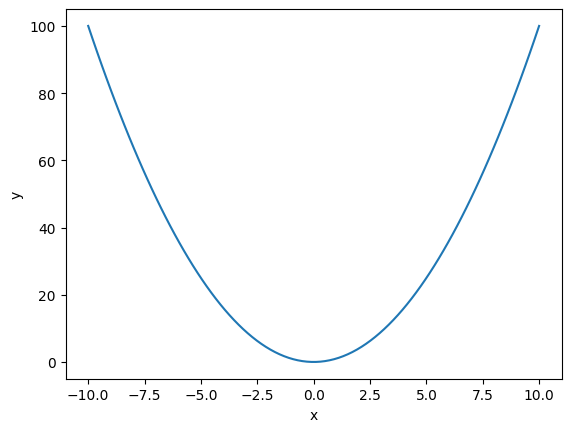

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
y = x**2
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

##d

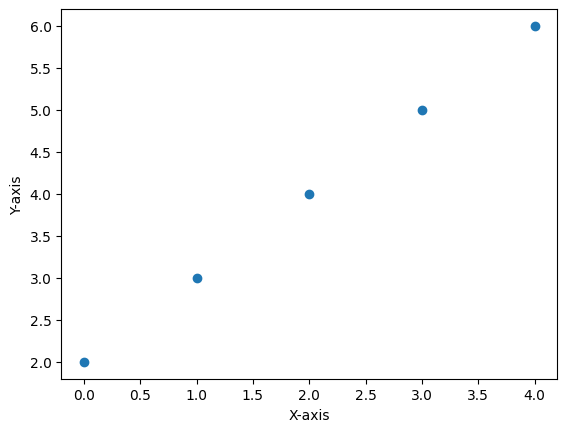

In [23]:
import matplotlib.pyplot as plt
import numpy as np
data = np.array([[0,2],[1,3],[2,4],[3,5],[4,6]])
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
plt.show()

#Problem 5

## Starter Code

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import accuracy_score as acc

In [25]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [26]:
# Dataset Reference :- https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
import os
os.system("wget https://www.dropbox.com/s/uxg337i0vobh2da/Wisconsin_DataSet.csv")
data = pd.read_csv("./Wisconsin_DataSet.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [27]:
# Note :- There are many existing Encoders for converting String to Numeric Labels, but for convenience, we used Pandas.

condition_M = data.diagnosis == "M"
condition_B = data.diagnosis == "B"

data.loc[condition_M,"diagnosis"]=0
data.loc[condition_B,"diagnosis"]=1

data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [28]:
Y = data.diagnosis.to_numpy().astype('int')                                     # Labels

X_data = data.drop(columns=["id","diagnosis","Unnamed: 32"])
X = X_data.to_numpy()                                                           # Input Features

In [29]:
X_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [30]:
user_prompt = 0.3
user_enable = False

x_train,x_test,y_train,y_test = tts(X,Y,test_size=user_prompt,shuffle=user_enable)

In [31]:
# Note :- Don't worry about the code snippet here, it is just to produce the predictions for the test data portion of each classifier

logistic_model = LR()
logistic_model.fit(x_train,y_train)
logistic_pred = logistic_model.predict(x_test)

decision_model = DTC()
decision_model.fit(x_train,y_train)
decision_pred = decision_model.predict(x_test)

##Evaluation Metrics (Inbulit v/s Scaratch)

### Confusion Matrix

In [32]:
inbuilt_matrix_logistic = cm(y_test,logistic_pred)
inbuilt_matrix_decision = cm(y_test,decision_pred)

print("Confusion Matrix for Logistic Regression-based Predictions =>")
print(inbuilt_matrix_logistic)
print("Confusion Matrix for Decision Tree-based Predictions =>")
print(inbuilt_matrix_decision)

def confusion_matrix(y,algo_pred):
  TP=0
  TN=0
  FP=0
  FN=0
  for i in range (len(algo_pred)):
    if(y_test[i]==1 and algo_pred[i]==1):
        TP+=1
    elif(y_test[i]==0 and algo_pred[i]==0):
        TN+=1
    elif(y_test[i]==0 and algo_pred[i]==1):
        FP+=1
    elif(y_test[i]==1 and algo_pred[i]==0):
        FN+=1
  return np.array([[TN,FP],[FN,TP]])

print("###Using Scratch built confusion_matrix")
print("Confusion Matrix for Logistic Regression-based Predictions Using Scratch built =>")
print(confusion_matrix(y_test,logistic_pred))
print("Confusion Matrix for Decision Tree-based Predictions Using Scratch built =>")
print(confusion_matrix(y_test,decision_pred))


Confusion Matrix for Logistic Regression-based Predictions =>
[[ 38   1]
 [ 11 121]]
Confusion Matrix for Decision Tree-based Predictions =>
[[ 38   1]
 [ 22 110]]
###Using Scratch built confusion_matrix
Confusion Matrix for Logistic Regression-based Predictions Using Scratch built =>
[[ 38   1]
 [ 11 121]]
Confusion Matrix for Decision Tree-based Predictions Using Scratch built =>
[[ 38   1]
 [ 22 110]]


### Average Accuracy and Class-Wise Accuracy

In [33]:
inbuilt_acc_logistic = acc(y_test,logistic_pred)
inbuilt_acc_decision = acc(y_test,decision_pred)

print("Accuracy for Logistic Regression-based Predictions =>",str(inbuilt_acc_logistic*100)+"%")
print("Accuracy for Decision Tree-based Predictions =>",str(inbuilt_acc_decision*100)+"%")

def avg_accuracy(y,algo_pred):
  total_correct=0
  for i in range(len(algo_pred)):
    if(y[i]==algo_pred[i]):
      total_correct+=1
  return (total_correct/len(algo_pred))*100

print("###Using Scratch built avg_accuracy")
print("Accuracy for Logistic Regression-based Predictions Using Scratch built =>")
print(avg_accuracy(y_test,logistic_pred),"%")
print("Accuracy for Logistic Regression-based Predictions Using Scratch built =>")
print(avg_accuracy(y_test,decision_pred),"%")


def class_accuracy(y,algo_pred):
  TP=0
  TN=0
  FP=0
  FN=0
  for i in range (len(algo_pred)):
    if(y[i]==1 and algo_pred[i]==1):
        TP+=1
    elif(y[i]==0 and algo_pred[i]==0):
        TN+=1
    elif(y[i]==0 and algo_pred[i]==1):
        FP+=1
    elif(y[i]==1 and algo_pred[i]==0):
        FN+=1
  return (((TP/(TP+FN))*100)+((TN/(TN+FP))*100))/2

print("###Using Scratch built class_accuracy")
print("Classwise accuracy for Logistic Regression-based Predictions Using Scratch built =>")
print(class_accuracy(y_test,logistic_pred),"%")
print("Classwise accuracy for Logistic Regression-based Predictions Using Scratch built =>")
print(class_accuracy(y_test,decision_pred),"%")

Accuracy for Logistic Regression-based Predictions => 92.98245614035088%
Accuracy for Decision Tree-based Predictions => 86.54970760233918%
###Using Scratch built avg_accuracy
Accuracy for Logistic Regression-based Predictions Using Scratch built =>
92.98245614035088 %
Accuracy for Logistic Regression-based Predictions Using Scratch built =>
86.54970760233918 %
###Using Scratch built class_accuracy
Classwise accuracy for Logistic Regression-based Predictions Using Scratch built =>
94.55128205128204 %
Classwise accuracy for Logistic Regression-based Predictions Using Scratch built =>
90.38461538461539 %


### Precision

In [34]:
inbuilt_ps_logistic = ps(y_test,logistic_pred)
inbuilt_ps_decision = ps(y_test,decision_pred)

print("Precision for Logistic Regression-based Predictions =>",str(inbuilt_ps_logistic*100)+"%")
print("Precision for Decision Tree-based Predictions =>",str(inbuilt_ps_decision*100)+"%")

def precision(y,algo_pred):
  TP=0
  FP=0
  for i in range (len(algo_pred)):
    if(y[i]==1 and algo_pred[i]==1):
        TP+=1
    elif(y[i]==0 and algo_pred[i]==1):
        FP+=1
  return (TP/(TP+FP))*100

print("###Using Scratch built precision")
print("Precision for Logistic Regression-based Predictions Using Scratch built =>")
print(precision(y_test,logistic_pred),"%")
print("Precision for Logistic Regression-based Predictions Using Scratch built =>")
print(precision(y_test,decision_pred),"%")

Precision for Logistic Regression-based Predictions => 99.18032786885246%
Precision for Decision Tree-based Predictions => 99.09909909909909%
###Using Scratch built precision
Precision for Logistic Regression-based Predictions Using Scratch built =>
99.18032786885246 %
Precision for Logistic Regression-based Predictions Using Scratch built =>
99.09909909909909 %


### Recall

In [35]:
inbuilt_rs_logistic = rs(y_test,logistic_pred)
inbuilt_rs_decision = rs(y_test,decision_pred)

print("Recall for Logistic Regression-based Predictions =>",str(inbuilt_rs_logistic*100)+"%")
print("Recall for Decision Tree-based Predictions =>",str(inbuilt_rs_decision*100)+"%")

def recall(y,algo_pred):
  TP=0
  FN=0
  for i in range (len(algo_pred)):
    if(y[i]==1 and algo_pred[i]==1):
        TP+=1
    elif(y[i]==1 and algo_pred[i]==0):
        FN+=1
  return (TP/(TP+FN))*100

print("###Using Scratch built recall")
print("Recall for Logistic Regression-based Predictions Using Scratch built =>")
print(recall(y_test,logistic_pred),"%")
print("Recall for Logistic Regression-based Predictions Using Scratch built =>")
print(recall(y_test,decision_pred),"%")

Recall for Logistic Regression-based Predictions => 91.66666666666666%
Recall for Decision Tree-based Predictions => 83.33333333333334%
###Using Scratch built recall
Recall for Logistic Regression-based Predictions Using Scratch built =>
91.66666666666666 %
Recall for Logistic Regression-based Predictions Using Scratch built =>
83.33333333333334 %


### F-1 Score

In [36]:
inbuilt_f1s_logistic = f1s(y_test,logistic_pred)
inbuilt_f1s_decision = f1s(y_test,decision_pred)

print("F1-Score for Logistic Regression-based Predictions =>",str(inbuilt_f1s_logistic*100)+"%")
print("F1-Score for Decision Tree-based Predictions =>",str(inbuilt_f1s_decision*100)+"%")

def f1_score(y,algo_pred):
  return (2*precision(y,algo_pred)*recall(y,algo_pred))/(precision(y,algo_pred)+recall(y,algo_pred))

print("###Using Scratch built f1_score")
print("F1-Score for Logistic Regression-based Predictions Using Scratch built =>")
print(f1_score(y_test,logistic_pred),"%")
print("F1-Score for Logistic Regression-based Predictions Using Scratch built =>")
print(f1_score(y_test,decision_pred),"%")

F1-Score for Logistic Regression-based Predictions => 95.2755905511811%
F1-Score for Decision Tree-based Predictions => 90.53497942386831%
###Using Scratch built f1_score
F1-Score for Logistic Regression-based Predictions Using Scratch built =>
95.27559055118108 %
F1-Score for Logistic Regression-based Predictions Using Scratch built =>
90.53497942386831 %


### Sensitivity

In [37]:
def sensitivity(y,algo_pred):
  TP=0
  FN=0
  for i in range (len(algo_pred)):
    if(y[i]==1 and algo_pred[i]==1):
        TP+=1
    elif(y[i]==1 and algo_pred[i]==0):
        FN+=1
  return (TP/(TP+FN))*100

print("###Using Scratch built sensitivity")
print("Sensitivity for Logistic Regression-based Predictions Using Scratch built =>")
print(sensitivity(y_test,logistic_pred),"%")
print("Sensitivity for Logistic Regression-based Predictions Using Scratch built =>")
print(sensitivity(y_test,decision_pred),"%")

###Using Scratch built sensitivity
Sensitivity for Logistic Regression-based Predictions Using Scratch built =>
91.66666666666666 %
Sensitivity for Logistic Regression-based Predictions Using Scratch built =>
83.33333333333334 %


### Specificity

In [38]:
def specificity(y,algo_pred):
  TN=0
  FP=0
  for i in range (len(algo_pred)):
    if(y[i]==0 and algo_pred[i]==0):
        TN+=1
    elif(y[i]==0 and algo_pred[i]==1):
        FP+=1
  return (TN/(TN+FP))*100

print("###Using Scratch built specificity")
print("specificity for Logistic Regression-based Predictions Using Scratch built =>")
print(specificity(y_test,logistic_pred),"%")
print("specificity for Logistic Regression-based Predictions Using Scratch built =>")
print(specificity(y_test,decision_pred),"%")

###Using Scratch built specificity
specificity for Logistic Regression-based Predictions Using Scratch built =>
97.43589743589743 %
specificity for Logistic Regression-based Predictions Using Scratch built =>
97.43589743589743 %
